# Проект "Автоматизация коммуникаций"
##Задача
Ежедневно Wildberries получает огромное количество различных обращений клиентов по различным вопросам и из разных источников. Многие из этих обращений обрабатываются при помощи автоматизированных систем. Вам предстоит создать вопросно-ответную систему, которая генерирует ответ на обращения в техподдержку для менеджеров ПВЗ.

Вам будут доступны данные в виде истории вопросов и ответов на них, а также база знаний в виде документов, в которых содержится информация, регламентирующая работу менеджера на ПВЗ и описывающая многие бизнес-
процессы.

## 1. Формализация задачи и EDA


На данном этапе вам необходимо:
- Проработать проблематику (чем подобного рода проблемы могут грозить бизнесу)
- Грамотно формализовать задачу
- Проанализировать имеющиеся данные и оценить их пригодность для решения поставленной задачи
- Провести первичный разведочный анализ данных (EDA)

### Проблематика


Сокращения:\
**АС** - Автоматизированная система

#### 1. Проблемы техподдержки


Проблемы техподдержки:

1. **Время ожидания**  \
Пользователь может столкнуться с длительным временем ожидания ответа при обращении в техподдержку.

2. **Недостаточная квалификация сотрудников** \
Eсли сотрудники техподдержки не обладают достаточными знаниями и навыками, они могут не справляться с решением проблем клиентов.

3. **Недоступность или неэффективность каналов связи** \
Eсли клиентам не предоставлены удобные способы обращения в техподдержку (например, чат, телефон, электронная почта), это может затруднить процесс получения помощи.

4. **Недостаточная информация и документация:** \
Eсли у пользователя нет доступа к достаточной информации или документации о продукте или услуге, это может затруднить им понимание и решение проблем.

5. **Недостаточная обратная связь:** \\
Отсутствие механизмов для сбора обратной связи от пользователей может привести к тому, что компания не будет знать о проблемах в работе техподдержки и не сможет их исправить.

Следствия:
1. Рост недовольства и раздражительности;
2. Потеря доверия и ухудшению репутации компании;
3. Отток пользователей и материальные убытки компании.


АС техподдерки позволяет решить ряд проблем:

1. **Быстрое реагирование:**\
АС могут обрабатывать запросы клиентов мгновенно и направлять их на соответствующего специалиста или решать простые вопросы без задержек.

2. **Доступность:**\
АС работают круглосуточно

3. **Снижение нагрузки на операторов:**\
АС могут решать стандартные вопросы и задачи, освобождая время и ресурсы операторов для работы с более сложными запросами.

4. **Повышение эффективности:**\
АС могут выполнять рутинные задачи, уведомления о статусе обращениях, сбор информации от клиентов, что позволяет оптимизировать процессы и повысить эффективность работы техподдержки.

5. **Сбор аналитики и обратной связи:**\
АС могут собирать данные о запросах клиентов, анализировать статистику обращений, получать обратную связь от пользователей, что помогает компании улучшать качество обслуживания и оптимизировать процессы техподдержки.


Следствия:
- Экономия ресурсов (снижение нагрузки на call-центр);
- Увеличение лояльности пользователя нашим продуктом: более быстрый ответ на обращение пользователя;
- Влияние на бизнес метрики: конверсия в покупку, рейтинг ПВЗ, отток
клиентов.

#### 2. Проблемы АС техподдержки


АС техподдержки могут столкнуться с некоторыми проблемами:

1. **Ограниченная способность понимания контекста:**\
АС могут иметь ограниченную способность понимать сложные вопросы или контекст обращения, что может привести к неправильным ответам или недостаточно точным решениям.

2. **Необходимость постоянного обновления:**\
Для того чтобы автоматизированная система оставалась эффективной, необходимо постоянно обновлять её базу знаний, алгоритмы и правила работы, что требует дополнительных ресурсов и времени.

3. **Недостаточная гибкость:**\
АС могут быть менее гибкими в сравнении с живыми операторами при решении нестандартных или сложных проблем клиентов, что может привести к неудовлетворению клиентов.

4. **Риск неправильной интерпретации:**\
Из-за ограничений в понимании естественного языка АС могут неправильно интерпретировать запросы клиентов и предлагать неверные решения.

5. **Низкая персонализация:**\
АС могут не обеспечивать достаточно персонализированного обслуживания, что может снизить уровень удовлетворенности клиентов.

6. **Проблемы с конфиденциальностью данных:**\
При использовании АС техподдержки возникает риск утечки конфиденциальной информации клиентов, если система не обеспечивает должный уровень защиты данных.

7. **Необходимость тщательного обучения:**\
Для того чтобы АС была эффективной, необходимо провести тщательное обучение и настройку, что может потребовать значительных затрат времени и ресурсов.

**Проблема поддержки актуальности.** Возможные решения:
- Регулярно обучать модель
- LLM-based агент
- RAG

### Формализация задачи

**Цель:** автоматизивовать систему поддержки пользователей для менеджеров ПВЗ. \
**Задача:** разработать АС техподдержки для взаимодействия с пользователями в формате диалога. \

**Входные данные:** строка (ответ/вопрос/запрос) \
**Выходные данные:** строка (суммаризированный ответ, генерация ответа/вопроса) \

#### Решение: RAG-система

Этапы фунционирования: \
A. Обработка входных данных:
  - Работа с текстом \
  Задачи:
    - Тематическое моделирование
    - Именованные сущности
    - Уникальные слова
  - Работа с вектором \
  Задачи:
    - Классификация входного запроса (определение намерения)
    - Векторизация текста

B. Организация данных в БД:
- По чанкам (нет организации)
  - вручную
  - скользящее окно + ML-алгоритмы
- По кластерам
- По темам
- По сущностям

C. Поиск информации в базе данных:
1. Текстовый поиск:
  - NER
  - Тематическое моделирование
  - Уникальные слова
2. Векторный поиск:
  - Брутфорс чанков
  - Поиск по кластерам
3. Комбинированный поиск:
  - NER + близость векторов
  - ТМ + близость векторов
  - Уникальные слова + близость векторов

D. Формирование промпта:
1. Чанк (группа чанков)
2. Запрос/вопрос/ответ пользователя
3. Шаблон-подсказка языковой модели

### Анализ данных

In [ ]:
!pip install umap-learn > None
!pip install transformers > None
!pip install spacy > None
!python -m spacy download ru_core_news_sm > None

In [ ]:
import pandas as pd
import numpy as np
import re

from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.cluster import DBSCAN
from umap import UMAP

import torch.nn.functional as F
import transformers
import spacy

sns.set_theme()
nlp = spacy.load("ru_core_news_sm")
seed = np.random.seed(2)

In [ ]:
# очистка html разметки
def clean_html(raw):
  cleanr = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
  raw = re.sub(cleanr, '', raw)
  raw = re.sub('< nt >', '', raw)
  cleantext = re.sub("\\n", '', raw)
  return cleantext

# нормализация и лемматизация текстов
def normalize(data, column):
  data[column] = data[column].apply(
      lambda x: ' '.join([str(token.lemma_).lower() for token in nlp(x) if
        not token.is_stop
        and not token.is_punct
        and not token.is_digit
        and not token.like_email
        and not token.like_num
        and not token.is_space
        and not token.like_url
      ])
    )
  return data


# функция, возвращает векторизированные предложения
def vectorize(model, tokenizer, data, dim=768):
  def average_pool(last_hidden_states, attention_mask):
    last_hidden = last_hidden_states.masked_fill(~attention_mask[..., None].bool(), 0.0)
    return last_hidden.sum(dim=1) / attention_mask.sum(dim=1)[..., None]

  data_vectorized = np.zeros((len(data), dim))
  for index, sentence in enumerate(data):
    batch_dict  = tokenizer(sentence, max_length=512, padding=True, truncation=True, return_tensors='pt')
    outputs = model(**batch_dict)
    embeddings = average_pool(outputs.last_hidden_state, batch_dict['attention_mask'])
    data_vectorized[index] = embeddings.detach().numpy()
  return data_vectorized


# функция подсчета именованных сущностей
def count_entities(data, column):
  entities = {}

  for sentence in data[column]:
    doc = nlp(sentence)
    for ent in doc.ents:
      label = ent.label_
      entity = ent.text
      if label not in entities.keys():
        entities[label] = {}
        entities[label][entity] = 1
      else:
        if entity not in entities[label].keys():
          entities[label][entity] = 1
        else:
          entities[label][entity] += 1
  return entities

# функция построения графиков частот именованных сущностей
def plot_entities(entities):
  fig, axes = plt.subplots(len(entities.keys()), 1,
                           figsize=(16, 14),
                           constrained_layout=True)

  for i in range(len(entities.keys())):
    label = list(entities.keys())[i]
    keys = list(entities[label].keys())
    values = list(entities[label].values())
    axes[i].bar(keys, values)
    axes[i].tick_params(labelsize=8, rotation=80)
    axes[i].set_title(f"\'{label}\' bar plot")

# визуализация признакого пространства
def plot_feature_space(features, labels=None, title=''):
  data = pd.DataFrame()
  data["comp-1"] = features[:,0]
  data["comp-2"] = features[:,1]

  if labels is not None:
    data['y'] = labels
    sns.scatterplot(x="comp-1", y="comp-2", hue=data.y.tolist(),
                    palette=sns.color_palette("hls", 10),
                    data=data).set(title=f'{title} data')
  else:
    sns.scatterplot(x="comp-1", y="comp-2",
                palette=sns.color_palette("hls", 10),
                data=data).set(title=f'{title} data')

#### Данные 'Вопрос-Ответ'

##### 1. Загрузка данных

In [ ]:
df = pd.read_excel('QA_pairs.xlsx')
df

,id,question,answer
0,2,Как вернуть на экран баланс?,"В полной версии сайта слева, в разделе ""Аналит..."
1,3,Какой договор заключается?,"1. Оферта – это самый важный документ, описыва..."
2,5,Какая минимальная площадь помещения?,"Площадь помещения, соответствующая требованиям..."
3,6,Какие требования к площади помещения?,"Площадь помещения, соответствующая требованиям..."
4,9,Как зарегистрироваться?,Для открытия пункта WB необходимо выполнить сл...
...,...,...,...
5927,12994,Как найти товар про баркоду?,Функционал просмотра истории товара доступен в...
5928,13000,Тональный крем отказ на ПВЗ,В случае обнаружения брака/несоответствия при ...
5929,13003,После одобрения заявки на ремонт помещенияб во...,"Если возникли вопросы при открытии ПВЗ, то обр..."
5930,13006,Можно ли отказаться в момент получения от колг...,"Если можно вскрыть заводскую упаковку товара, ..."


In [ ]:
# проверка данных на мусор
df['question'].sample(100).to_numpy()

array(['Как внести адрес на карту ПВЗ?',
       'Стёртое ШК, сканируем по боту просит вести коробку, а коробку не видит. Что делать?',
       'Можно вскрывать и проверять наушники в заводской упаковке?',
       'Где здесь регулировать звук?', 'Убрать голос',
       'Как предоставить доступ с электронным замком сотрудникам ПВЗ?',
       'Как зарегистрировать сотрудника?', 'Как работать с ювелиркой?',
       'Что за задержка в приемке на нашем ПВЗ?', 'Сбросились доставки',
       'Почему ночные коробку должны принять до 10:00?',
       'Как узнать номер ШК без коробки?', 'Что написать на ключах?',
       'Доход пункта выдачи зависит от тарифа и оборота?',
       'В какой ячейке лежит ШК?',
       'Что делать, если у Клиента стоит что товар оплачен, а приложении не оплачено',
       'Найти выданный товар', 'Убрать вещь с коробки, случайно добавил',
       'Ожидание оплаты. Когда упадет на счет?',
       'Закрылась автоматически коробка, а там в эту коробку закрылись КГТ',
       'Где посм

In [ ]:
# кол-во данных
df.shape

(5932, 3)

In [ ]:
# проверка на пропуски в данных
df.isna().sum()

id          0
question    0
answer      0
dtype: int64

In [ ]:
# типы данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5932 entries, 0 to 5931
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        5932 non-null   int64 
 1   question  5932 non-null   object
 2   answer    5932 non-null   object
dtypes: int64(1), object(2)
memory usage: 139.2+ KB


In [ ]:
# проверка на уникальные элементы
df[['question', 'answer']].duplicated().sum()

8

In [ ]:
# удаление дублей
df = df[~df[['question', 'answer']].duplicated()]

In [ ]:
# проверка на уникальные элементы по признакам
print('Кол-во уникальных элементов по столбцам')
print("'id'-column:", df['id'].nunique())
print("'question'-column:", df['question'].nunique())
print("'answer'-column:", df['answer'].nunique())

Кол-во уникальных элементов по столбцам
'id'-column: 5924
'question'-column: 5922
'answer'-column: 2743


In [ ]:
# Длины предложений
df_lengths = df.copy()
df_lengths['question'] = df_lengths['question'].apply(lambda x: len(x))
df_lengths['answer'] = df_lengths['answer'].apply(lambda x: len(x))
df_lengths.drop(columns=['id'], inplace=True)

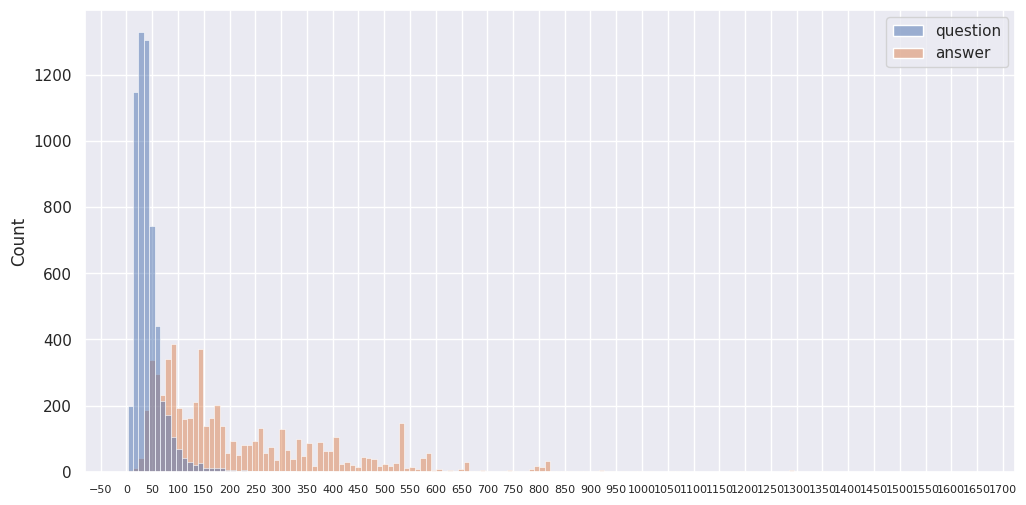

In [ ]:
plt.subplots(figsize=(12, 6))
ax = sns.histplot(data=df_lengths)

ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.xticks(fontsize=8);

In [ ]:
df_lengths.describe()

,question,answer
count,5924.000000,5924.000000
mean,42.446658,218.729237
std,31.220846,181.863789
min,2.000000,9.000000
25%,25.000000,87.000000
50%,36.000000,151.000000
75%,50.000000,306.000000
max,652.000000,1642.000000


In [ ]:
np.median(df_lengths, axis=0)

array([ 36., 151.])

**Выводы:**
1. Нет пропусков в данных
2. Удалены дубликаты
3. Нет мусора в данных

Из графиков длин данных вопрос-ответ получена следующая информация:
1. Длины текстов (медианнные значения):
  - Вопрос: 36 символ
  - Ответ: 151 символ
2. Макс. и мин. зафиксированные длины текстов:
  - Вопрос: 2 и 652 символ
  - Ответ: 9 и 1642 символ
3. С.к.о. длин текстов:
  - Вопрос: 31
  - Ответ: 181.9


Видно, что количество уникальных ответов меньше, чем количество вопросов пользователей. Это значит, что многие вопросы можно обобщить одним вопросом с соответствущим ответом, то есть схожие вопросы должны формировать кластер.


##### 2. Кластеризация

Проверим гипотезы:
1. Вопросы разделяются на кластеры
2. Ответы разделяются на кластеры

Для получения эмбеддингов предложений используется RuBERT.

In [ ]:
model_name = "DeepPavlov/rubert-base-cased"
model = transformers.AutoModel.from_pretrained(model_name)
tokenizer = transformers.AutoTokenizer.from_pretrained(model_name)

Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Получение эмбеддингов

In [ ]:
df

In [ ]:
ques_vectors = vectorize(model, tokenizer, df_subsamples['question'], dim=768)
ans_vectors = vectorize(model, tokenizer, df_subsamples['answer'], dim=768)

Визуализация признакового пространства вопросов

<ipython-input-149-1684912055a6>:85: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="comp-1", y="comp-2",


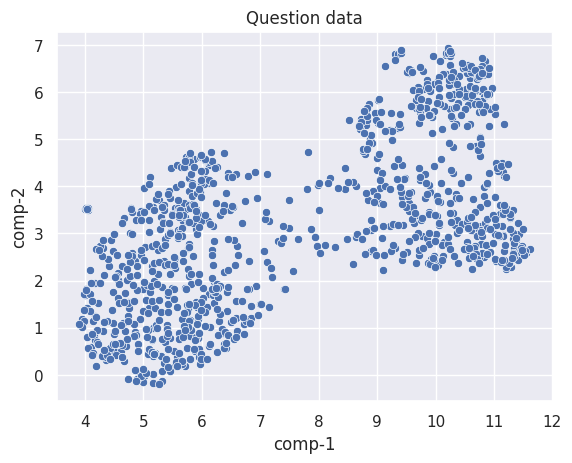

In [ ]:
feat = UMAP(random_state=seed).fit_transform(ques_vectors)
plot_feature_space(feat, title='Question')

Визуализация признакового пространства ответов

<ipython-input-3-1684912055a6>:81: UserWarning: 
The palette list has fewer values (10) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x="comp-1", y="comp-2", hue=data.y.tolist(),


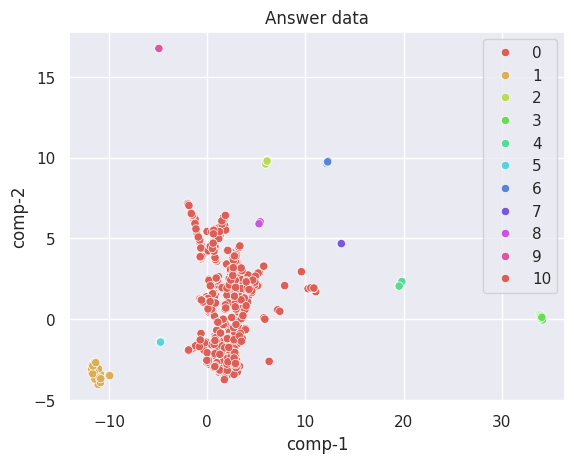

In [ ]:
feat = UMAP(random_state=seed).fit_transform(ans_vectors)
clustering = DBSCAN(eps=2, min_samples=5).fit(feat)
plot_feature_space(feat, labels=clustering.labels_, title='Answer')

In [ ]:
df_subsamples['target'] = clustering.labels_

Посмотрим на ответы в рамках одного кластера

In [ ]:
indexes = np.where(clustering.labels_ == 0)
df_subsamples.iloc[indexes]['answer'].tolist()[:10]

['Нужно выдать один товар клиенту, а второй товар не проводя по программе вернуть на склад',
 'Если клиент проявляет агрессию, то необходимо вежливо и аккуратно выяснить причину, по которой он так себя ведет, и найти компромиссное решение. Важно помнить, что агрессия может быть вызвана различными факторами, такими как:\n\n1. Необоснованные ожидания и ожидания, которые не соответствуют действительности. Клиент может ожидать от магазина большего, чем он получил на самом деле. В таком случае необходимо объяснить, почему это произошло и как можно исправить ситуацию.\n\n2. Конфликтная ситуация, которая возникла из-за неправильного поведения клиента. Если клиент ведет себя агрессивно, возможно, у него есть какие-то проблемы в личной жизни или работе. Необходимо разобраться в этой ситуации и найти решение, которое будет удовлетворять обе стороны.\n\n3. Несоблюдение правил поведения в магазине или на рабочем месте. Например, если клиент не соблюдает правила безопасности, может возникнуть конфл

In [ ]:
indexes = np.where(clustering.labels_ == 1)
df_subsamples.iloc[indexes]['answer'].tolist()[:10]

['Если вопрос касается ПВЗ то, вы можете создать тикет или обратится в чат собственников',
 'Если вопрос касается ПВЗ то, вы можете создать тикет или обратится в чат собственников',
 'Если вопрос касается ПВЗ то, вы можете создать тикет или обратится в чат собственников',
 'Телефонов нет \nВсе обращения от клиентов можно направить в ЛК и чат бот\nДля сотрудников ПВЗ есть тикеты и чат собственников',
 'Если вопрос касается ПВЗ то, вы можете создать тикет или обратиться в чат собственников',
 'Если вопрос касается ПВЗ то, вы можете создать тикет или обратится в чат собственников',
 'Вы можете обратиться в тикеты или чат собственников',
 'Если вопрос касается ПВЗ то, вы можете создать тикет или обратится в чат собственников',
 'Если вопрос касается ПВЗ то, вы можете создать тикет или обратится в чат собственников',
 'Если вопрос касается ПВЗ то, вы можете создать тикет или обратиться в чат собственников']

Визуализация признакового пространства вопросов с метками кластеров ответов

<ipython-input-149-1684912055a6>:81: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  sns.scatterplot(x="comp-1", y="comp-2", hue=data.y.tolist(),


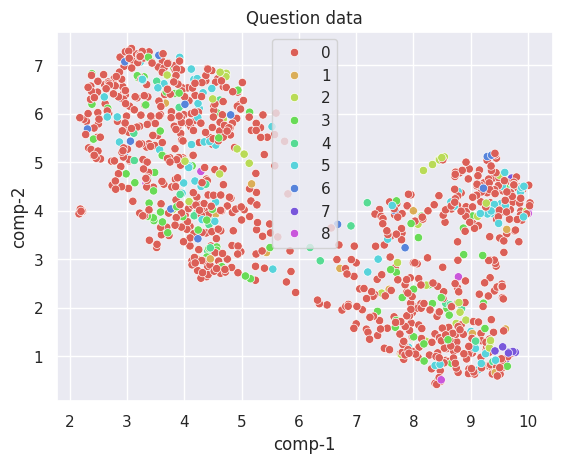

In [ ]:
feat = UMAP(random_state=seed).fit_transform(ques_vectors)
plot_feature_space(feat, labels=clustering.labels_, title='Question')

Для получения эмбеддингов предложений используется E5.

In [ ]:
model_name = "intfloat/multilingual-e5-large"
model = transformers.AutoModel.from_pretrained(model_name)
tokenizer = transformers.AutoTokenizer.from_pretrained(model_name)

Получение эмбеддингов:

In [ ]:
ques_vectors = vectorize(model, tokenizer, df['question'].sample(1000), dim=1024)
ans_vectors = vectorize(model, tokenizer, df['answer'].sample(1000), dim=1024)

Визуализация признакового пространства вопросов:

<ipython-input-3-373f3efb9642>:74: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.scatterplot(x="comp-1", y="comp-2", hue=data.y.tolist(),


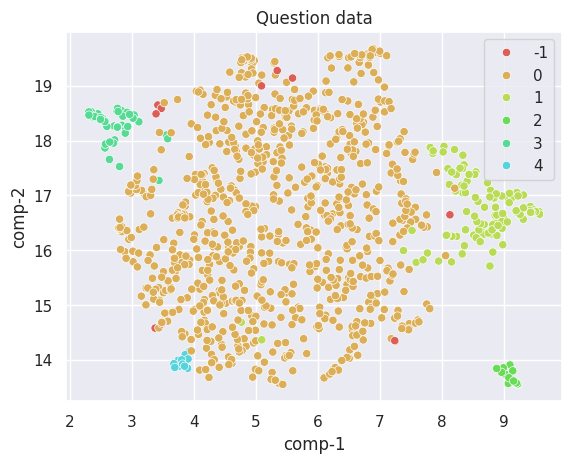

In [ ]:
feat = UMAP(random_state=seed).fit_transform(ques_vectors)
plot_feature_space(feat, labels=clustering.labels_, title='Question')

Визуализация признакового пространства ответов:

<ipython-input-3-373f3efb9642>:74: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  sns.scatterplot(x="comp-1", y="comp-2", hue=data.y.tolist(),


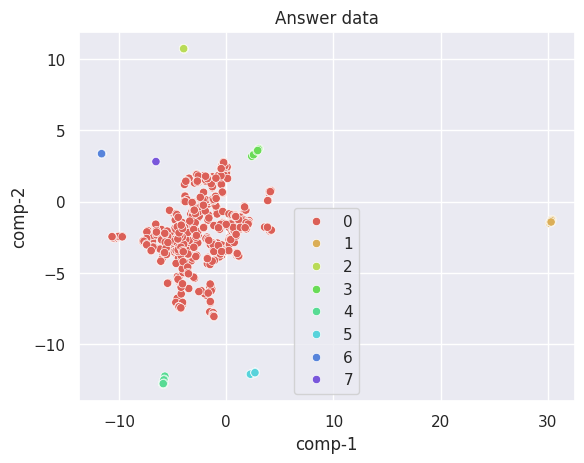

In [ ]:
feat = UMAP(random_state=seed).fit_transform(ans_vectors)
clustering = DBSCAN(eps=2, min_samples=5).fit(feat)
plot_feature_space(feat, labels=clustering.labels_, title='Answer')

**Выводы**\
Проверка гипотез:
1. Вопросы трудно разделить на осмысленные кластеры
2. Ответы разделяются на кластеры, объединенные общей темой

##### 3. Выявление сущностей

In [ ]:
# нормализация и лемматизация
df = normalize(df, column='question')

<ipython-input-3-373f3efb9642>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].apply(


Посмотрим на наличие сущностей в запросах

In [ ]:
for sentence in df['question'].sample(50):
  print(sentence)
  doc = nlp(sentence)
  for ent in doc.ents:
      print(ent.text, ent.start_char, ent.end_char, ent.label_)
  print('--'*10)

открыть пвз перегруженном город понимать выгодный
--------------------
ждать ответ вопрос тикете
--------------------
делать слететь код клиент
--------------------
завершить приёмка коробка
--------------------
принять ботинок часть код коробка
--------------------
закрытие день
--------------------
хотеть открыть первый пвз разобраться помочь
--------------------
принять поставка
--------------------
находиться кнопка оспорить
--------------------
товар дом принимать бирка
--------------------
правельно оформить брак клеента
--------------------
товар оплачиваться получение
--------------------
сократить рабочий день пвз
--------------------
сделать возврат вскрыть заводский упаковка
--------------------
покупатель отказаться оплаченного товар зажигалка проведения возврат обнаружиться товар оказаться утилизация правильно поступить ситуация
--------------------
ошибочно открыть возвратный коробка закрыть
--------------------
зарегистрировать сотрудник
--------------------
ошибка оплат

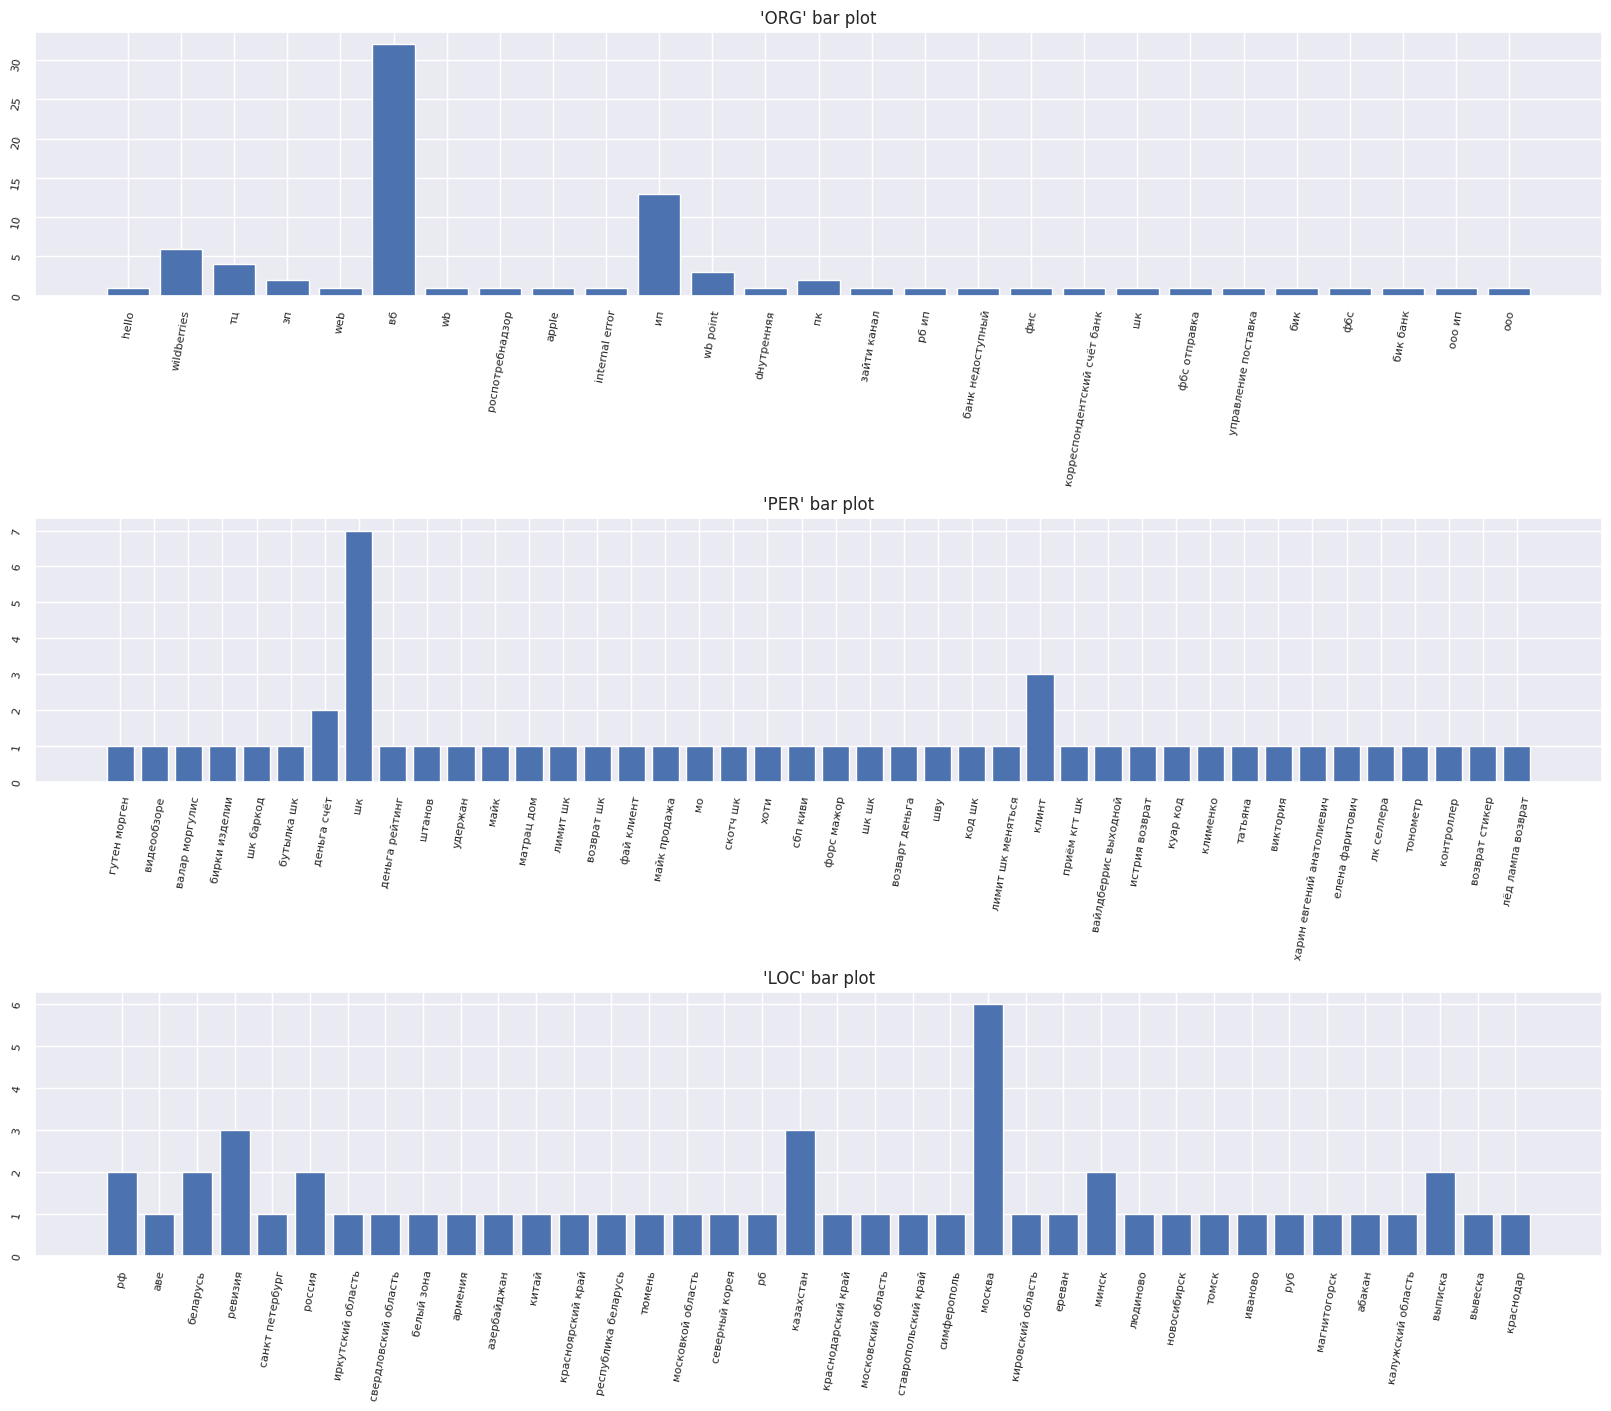

In [ ]:
# подсчет именнованных сущностей
entities = count_entities(df, column='question')

# отрисовка графиков частот именованных сущностей
plot_entities(entities)

Посмотрим на наличие сущностей в ответах

In [ ]:
for sentence in df['answer'].sample(50):
  print(sentence)
  doc = nlp(sentence)
  for ent in doc.ents:
      print(ent.text, ent.start_char, ent.end_char, ent.label_)
  print('--'*10)

Излишки нужно принять и сформировать коробку с товаром во вкладке "Ошибочные доставки", после чего передать курьеру для отправки на склад
--------------------
Нужно принять этот товар как брак
--------------------
Если вопрос касается ПВЗ то, вы можете создать тикет или обратиться в чат собственников
--------------------
Нужно зайти во вкладку «Возвраты поставщику», отсканировать клиентский код в приложении и выдать товар

Выдача произойдет автоматически

Ссылка на раздел "Возврат поставщику": https://point.wb.ru/srt/list
--------------------
ШК в программе может отличается от ШК на наклейке из-за того что, в программе может быть указан ВБ стикер.

Проверьте товар по поиску ШК

Функционал просмотра истории товара доступен в разделе "Помощник".

ШК можно ввести текстом или при помощи сканера

Ссылка на раздел "Помощник": https://point.wb.ru/search
ШК 35 37 ORG
ВБ 96 98 ORG
ШК

Функционал просмотра истории товара доступен 134 182 ORG
--------------------
Если клиент отказывается от товар

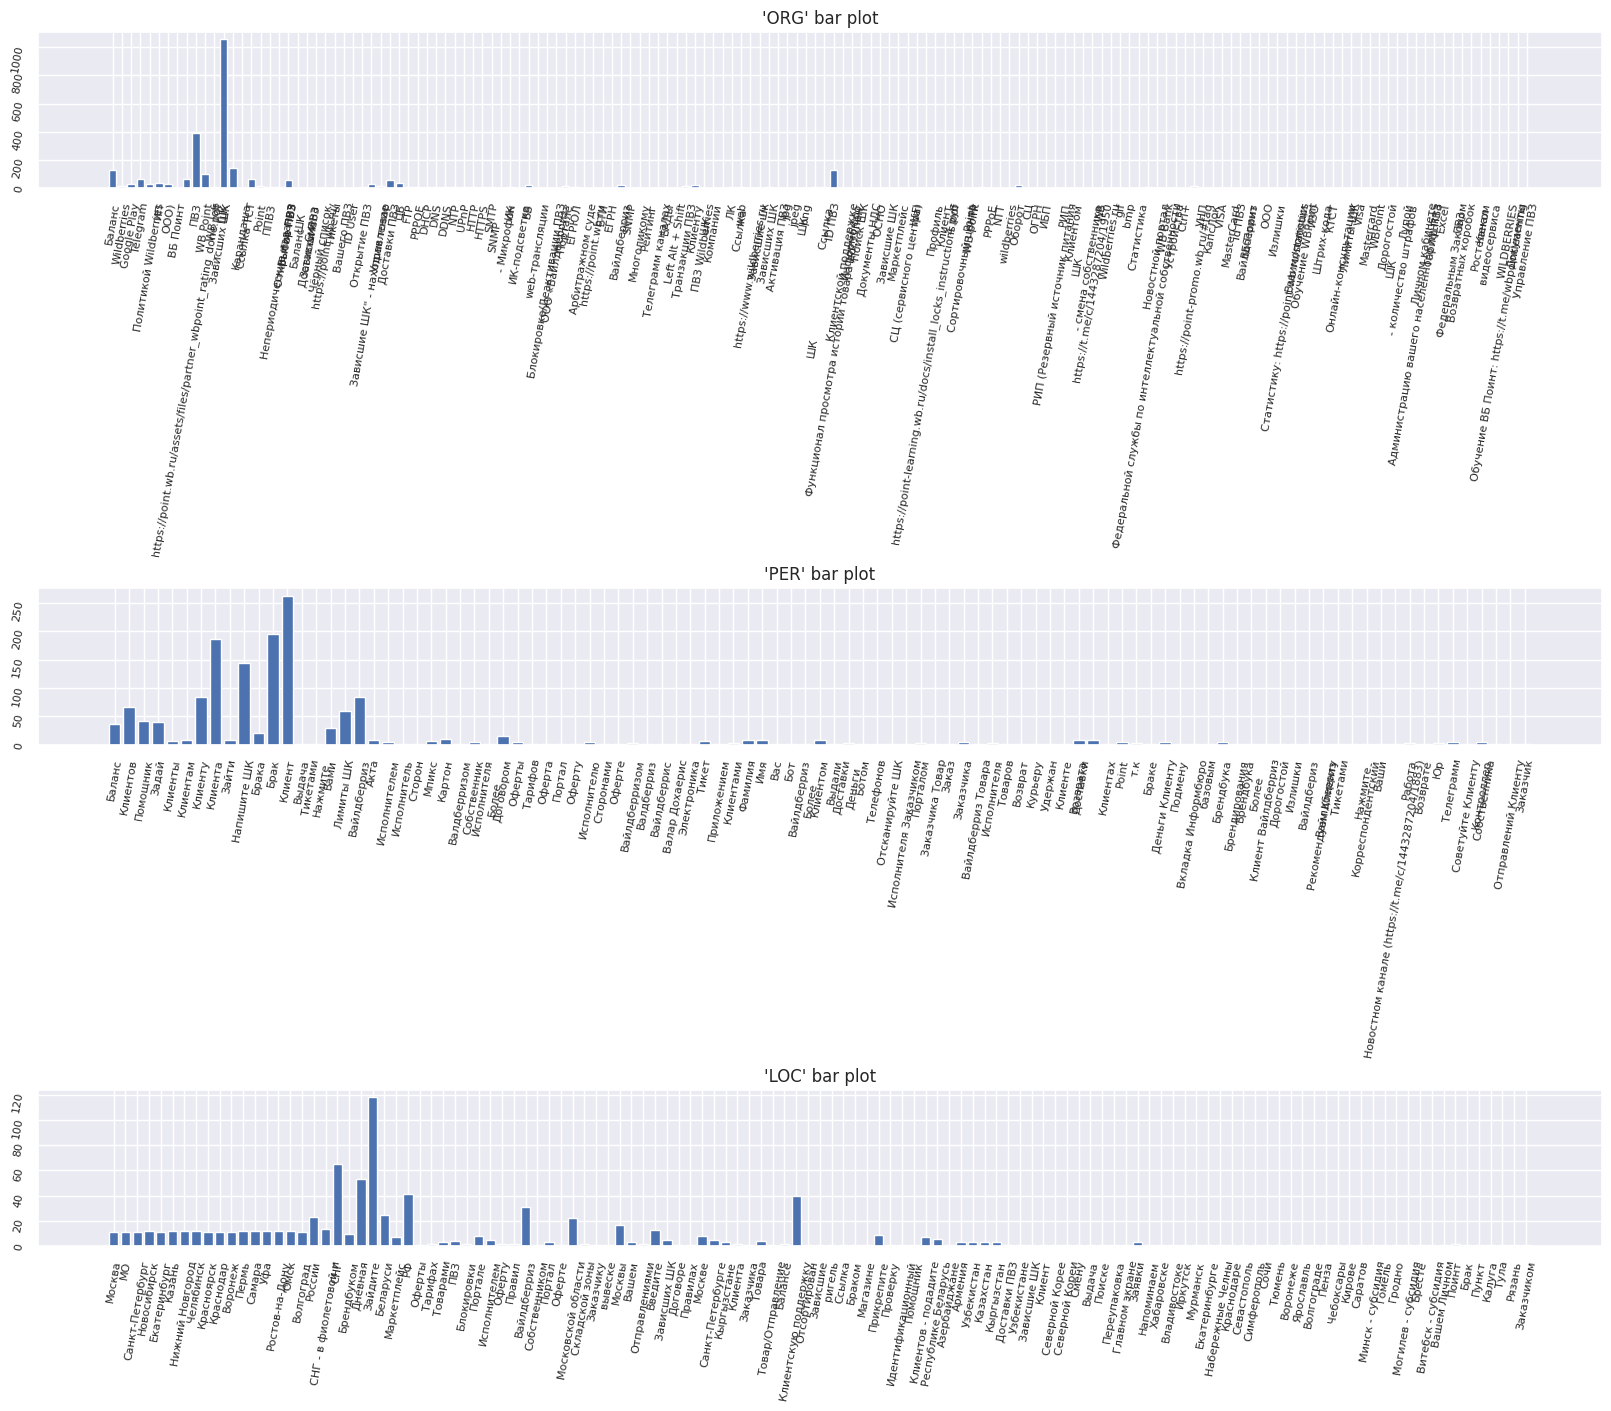

In [ ]:
# подсчет именнованных сущностей
entities = count_entities(df, column='answer')

# отрисовка графиков частот именованных сущностей
plot_entities(entities)

**Выводы**\
В запросе пользователя не всегда есть сущности, однако, много сущностей в потенциальном ответе.

#### Данные 'База знаний'

##### 1. Загрузка данных

In [ ]:
df = pd.read_excel('knowledge_base.xlsx')
df

,id,chunk,document_id,part_id
0,1588,Оферта – условия настоящей оферты об оказании ...,1,1.0
1,1589,Исполнитель – коммерческая организация или инд...,1,1.0
2,1590,Заказчик или Вайлдберриз - одно из перечисленн...,1,1.0
3,1591,"Договор – договор об оказании услуг, заключенн...",1,1.0
4,1592,Пункт выдачи заказов (ПВЗ) – нежилое помещение...,1,1.0
...,...,...,...,...
928,1498,"Обязательно ли проверять соответствие, если мы...",13,NaN
929,1499,В одну коробку можно класть НЕпереупакованые т...,13,NaN
930,1586,Как переупаковывать верхнюю одежду <nt> Провер...,13,NaN
931,1587,"На товаре нет ни бирки, ни вшивных элементов п...",13,NaN


In [ ]:
# проверка данных на мусор
df['chunk'].sample(100).to_numpy()

array(['Отправление – Товар или несколько Товаров, предназначенных для выдачи одному Клиенту и/или Продавцу, упакованные в одну упаковку (пакет,тару или иную упаковку), имеющую маркировку, содержащую номер Заказа и сведения о Клиенте (имя и фамилию Клиента) и/или Продавце;',
       'Видеонаблюдение Наши сотрудники, при работе с тикетами Зависшие ШК и Подмены столкнулись с такими ситуациями, что хранение данных у Вас находится не в облачном сервисе, а именно за частую данные хранятся на жестких дисках и флешках, что не совсем удобно Вам для быстрой нарезки видео и оспаривания Зависших ШК и Подмен, поэтому мы рекомендуем: хранить записи с камер на облачном сервисе минимальный срок хранения 90 дней. Примеры подходящих сервисов для облачного просмотра: trassircloud ipeye ivideon линия С общей инструкцией Вы можете ознакомиться более подробно на нашем сайте: https://point-promo.wb.ru/video-connection',
       'Инструкция оспаривание удержаний за подмену товара/nВ случае подмены товара согла

In [ ]:
df['chunk'] = df['chunk'].apply(lambda text_data: clean_html(text_data))

In [ ]:
# кол-во данных
df.shape

(933, 4)

In [ ]:
# проверка на пропуски в данных
df.isna().sum()

id              0
chunk           0
document_id     0
part_id        89
dtype: int64

In [ ]:
# типы данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 933 entries, 0 to 932
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           933 non-null    int64  
 1   chunk        933 non-null    object 
 2   document_id  933 non-null    int64  
 3   part_id      844 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 29.3+ KB


In [ ]:
# проверка на уникальные элементы
df[['chunk', 'document_id', 'part_id']].duplicated().sum()

7

In [ ]:
# удаление дублей
df = df[~df[['chunk', 'document_id', 'part_id']].duplicated()]

In [ ]:
# проверка на уникальные элементы по признакам
print('Кол-во уникальных элементов по столбцам')
print("'id'-column:", df['id'].nunique())
print("'chunk'-column:", df['chunk'].nunique())
print("'document_id'-column:", df['document_id'].nunique())
print("'part_id'-column:", df['part_id'].nunique())

Кол-во уникальных элементов по столбцам
'id'-column: 926
'chunk'-column: 916
'document_id'-column: 11
'part_id'-column: 51


In [ ]:
# Длины предложений
df_lengths = df.copy()
df_lengths['chunk'] = df_lengths['chunk'].apply(lambda x: len(x))
df_lengths.drop(columns=['id', 'document_id', 'part_id'], inplace=True)

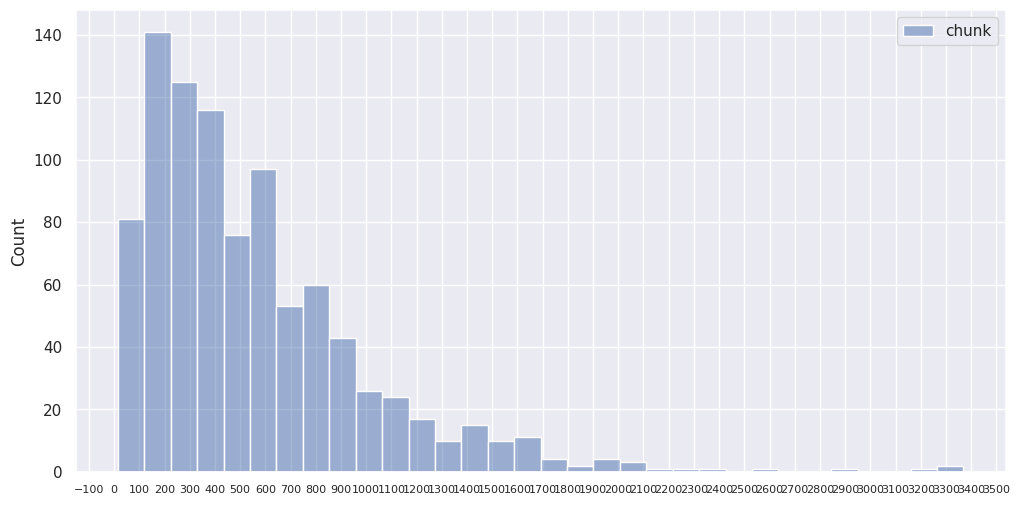

In [ ]:
plt.subplots(figsize=(12, 6))
ax = sns.histplot(data=df_lengths)

ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.xticks(fontsize=8);

In [ ]:
df_lengths.describe()

,chunk
count,926.000000
mean,556.725702
std,451.045136
min,15.000000
25%,233.000000
50%,434.000000
75%,754.500000
max,3369.000000


In [ ]:
np.median(df_lengths, axis=0)

array([434.])

**Выводы:**
1. Есть пропуски в данных в поле part_id
2. Удалены дубликаты
3. Удален мусор в данных

Из графиков длин данных базы знаний получена следующая информация:
1. Длины чанков (медианнные значения): 434 символ
2. Макс. и мин. зафиксированные длины чанков: 15 и 3369 символ
3. С.к.о. длин чанков: 451.1

##### 2. Кластеризация

Проверим гипотезу: данные базы знаний формируют кластеры

Для получения эмбеддингов предложений используется RuBERT.

In [ ]:
model_name = "DeepPavlov/rubert-base-cased"
model = transformers.AutoModel.from_pretrained(model_name)
tokenizer = transformers.AutoTokenizer.from_pretrained(model_name)

Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
chunk_vectors = vectorize(model, tokenizer, df['chunk'])

<ipython-input-20-8a398fd769f8>:70: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="comp-1", y="comp-2",


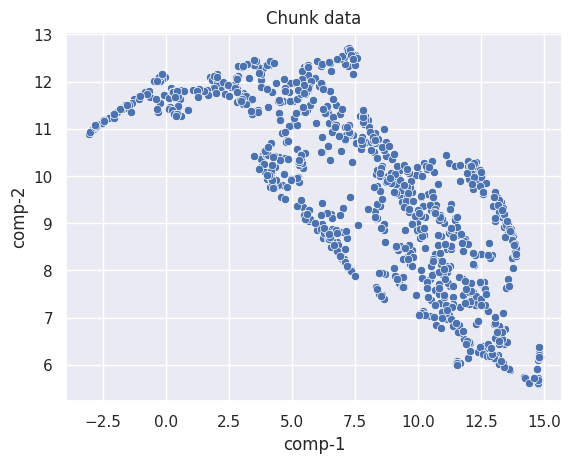

In [ ]:
feat = UMAP(random_state=seed).fit_transform(chunk_vectors)
plot_feature_space(feat, title='Chunk')

**Выводы**\
Данные базы знаний трудно разделить на осмысленные кластеры

##### 3. Выявление сущностей

In [ ]:
# нормализация и лемматизация
df = normalize(df, column='chunk')

<ipython-input-20-8a398fd769f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].apply(


Посмотрим на наличие сущностей в чанках

In [ ]:
for sentence in df['chunk'].sample(50):
  print(sentence)
  doc = nlp(sentence)
  for ent in doc.ents:
      print(ent.text, ent.start_char, ent.end_char, ent.label_)
  print('--'*10)

случай пвз исполнитель полностью соответствовать требование регламент состояние пвз специальный раздел брендбук портал присвоить внутренний статус брендированный указать статус присваиваться пвз портал соответствие пвз требование подтвердить сотрудник вайлдберриз заявка исполнитель пвз статус брендированный распространяться обязанность соответствие требование установить регламент состояние пвз
--------------------
убрать оценка < nt > оценка удаляться клиент прийти пвз повторно рейтинг учесть новый оценка
--------------------
закрыть коробка nзакрытые коробка передать курьер вместе остальными возвратный коробка пропасть раздел принять склад
--------------------
обновленный помощник хотим напомнить декабрь обновить помощник ответ живой вопрос ответить раздел переехать переход отдельный вкладка запустить окно поверх вкладка кнопка правый нижний угол прерывать работа активно развивать функционал помощник встроить поиск шк найти информация конкретный товар увидеть история движение товар но

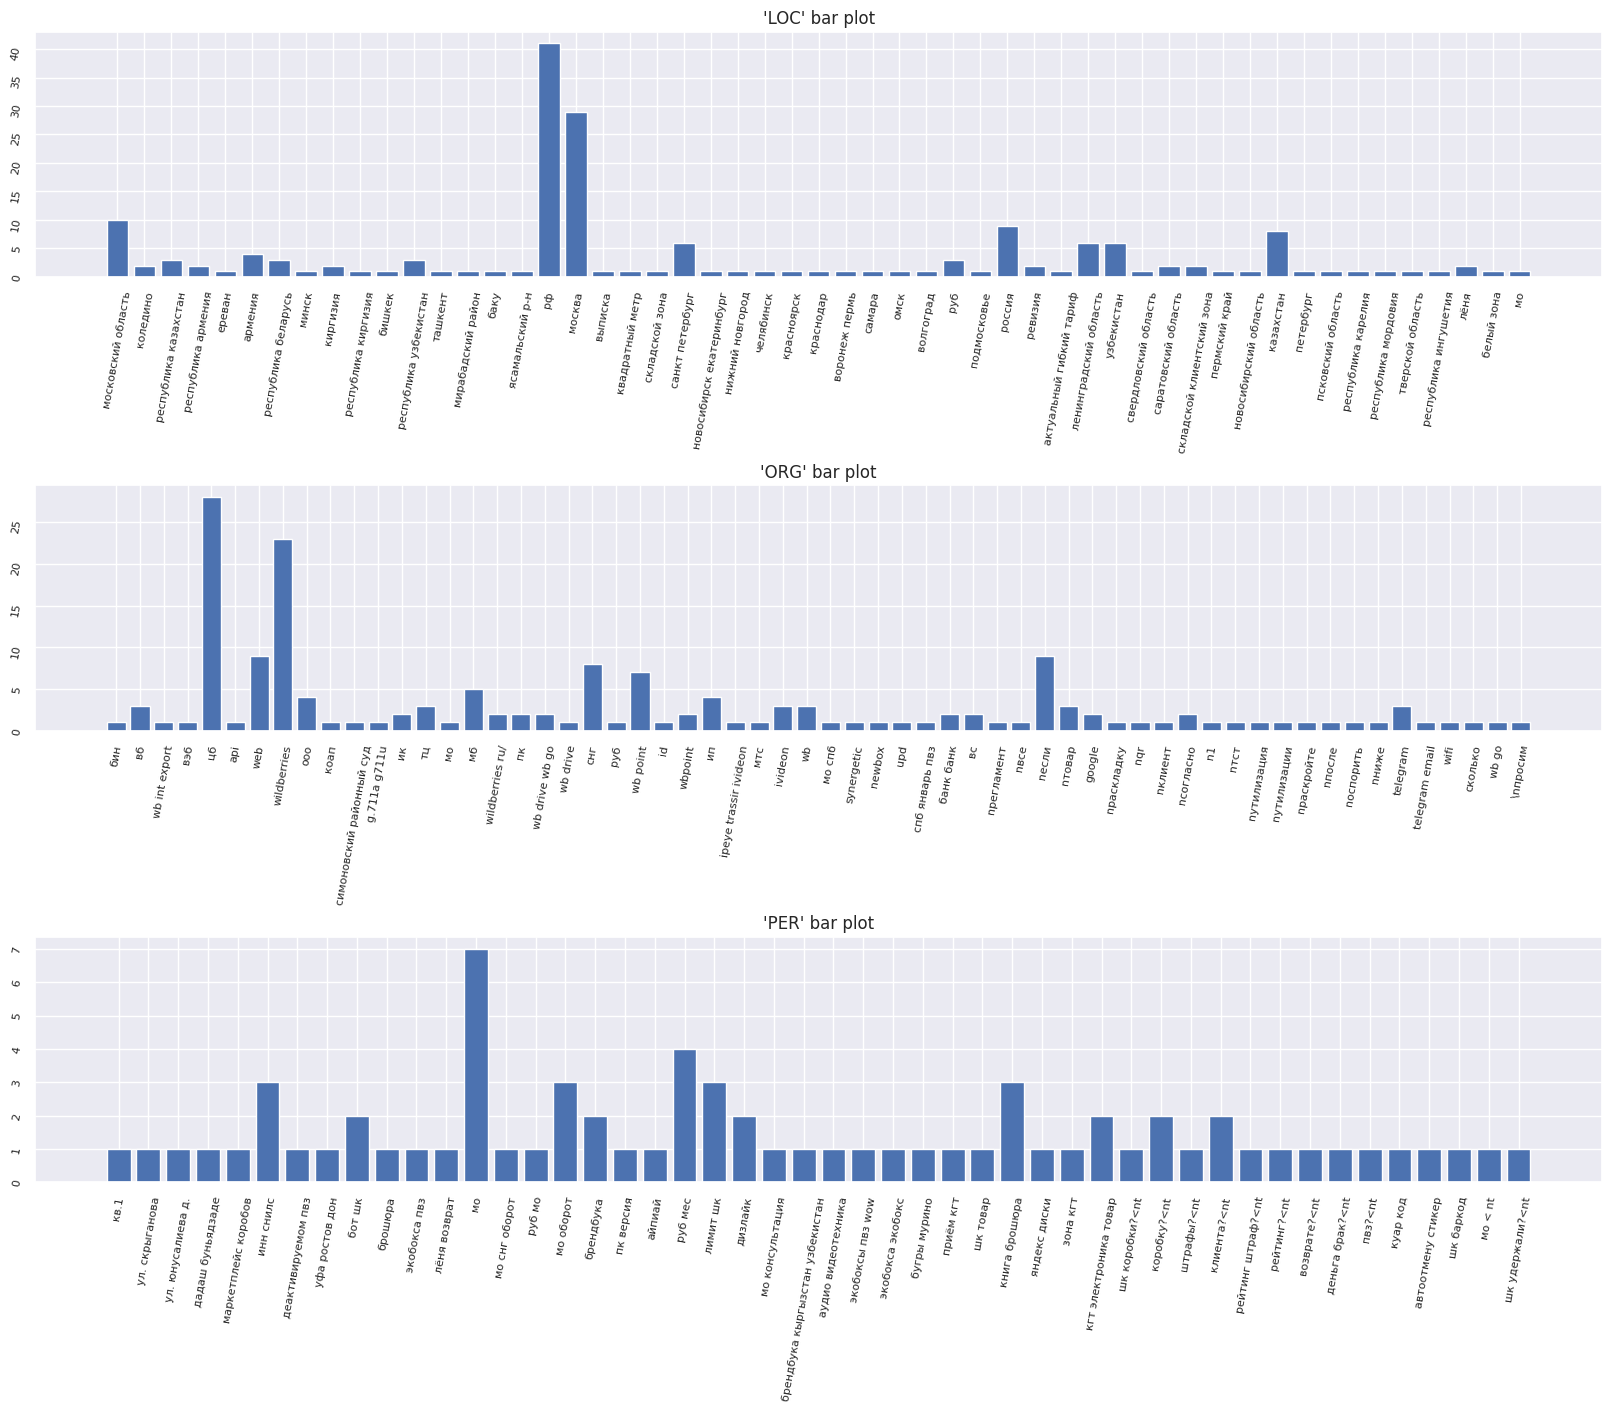

In [ ]:
# подсчет именнованных сущностей
entities = count_entities(df, column='chunk')

# отрисовка графиков частот именованных сущностей
plot_entities(entities)

**Выводы**\
В чанках имеется много именованных сущностей.

## ИТОГ

**Датасет "Вопрос-Ответ"**\
Были проведены проверки гипотез, которые показали, что вопросы сложно разделить на осмысленные кластеры, в то время как ответы можно объединить в кластеры по общей теме. Для решения этой проблемы предложено присвоение вопросам меток кластеров, соответствующих им ответов, обучение классификатора на помеченных вопросах и классификация новых вопросов пользователей.\
NER-модели могут использоваться только вспомогательно, не являясь основными.

**Датасет "База знаний"**\
Отмечается наличие множества именованных сущностей в чанках. Для такой базы знаний предлагается использование структуры данных (например, хэш-таблицы), где по названию сущности можно найти список чанков, в которых она встречается. При поступлении запроса от пользователя, анализируется наличие именованных сущностей, после чего по ним проводится поиск релевантных чанков из хеш-таблицы.